# Importing Libraries used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Reading Data 

In [2]:
df = pd.read_csv("books.csv")
df

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,6,11870085,11870085,16827462,226,525478817,9.780525e+12,John Green,2012.0,The Fault in Our Stars,...,2346404,2478609,140739,47994,92723,327550,698471,1311871,https://images.gr-assets.com/books/1360206420m...,https://images.gr-assets.com/books/1360206420s...
4,12,13335037,13335037,13155899,210,62024035,9.780062e+12,Veronica Roth,2011.0,Divergent,...,1903563,2216814,101023,36315,82870,310297,673028,1114304,https://images.gr-assets.com/books/1328559506m...,https://images.gr-assets.com/books/1328559506s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1349,9925,86737,86737,3877968,52,1582349177,9.781582e+12,Mary Hoffman,2002.0,City of Masks,...,12048,13385,555,314,758,3154,4872,4287,https://images.gr-assets.com/books/1294870497m...,https://images.gr-assets.com/books/1294870497s...
1350,9937,13010211,13010211,18171867,22,1596435712,9.781596e+12,Caragh M. O'Brien,2012.0,Promised,...,11766,12884,1260,256,1098,3565,4392,3573,https://images.gr-assets.com/books/1330546217m...,https://images.gr-assets.com/books/1330546217s...
1351,9942,16074758,16074758,21869436,18,1442486597,9.781442e+12,"Abigail Haas, Abby McDonald",2013.0,Dangerous Girls,...,10439,12970,2631,203,553,2029,4567,5618,https://images.gr-assets.com/books/1356513050m...,https://images.gr-assets.com/books/1356513050s...
1352,9947,21393526,21393526,40690062,19,62320521,9.780062e+12,Maria Dahvana Headley,2015.0,Magonia,...,12510,13652,2910,577,1440,3881,4772,2982,https://images.gr-assets.com/books/1413479866m...,https://images.gr-assets.com/books/1413479866s...


## Check for missing values

In [3]:
missing_values = df.isna()
print(missing_values)
Cleandf = df.dropna()

      book_id  goodreads_book_id  best_book_id  work_id  books_count   isbn  \
0       False              False         False    False        False  False   
1       False              False         False    False        False  False   
2       False              False         False    False        False  False   
3       False              False         False    False        False  False   
4       False              False         False    False        False  False   
...       ...                ...           ...      ...          ...    ...   
1349    False              False         False    False        False  False   
1350    False              False         False    False        False  False   
1351    False              False         False    False        False  False   
1352    False              False         False    False        False  False   
1353    False              False         False    False        False  False   

      isbn13  authors  original_publication_year  o

## Focus on the Harry Potter book series

In [4]:
harry_potter_books = Cleandf[Cleandf["title"].str.contains("Harry Potter", case=False, na=False)]
print(harry_potter_books)

      book_id  goodreads_book_id  best_book_id   work_id  books_count  \
1           2                  3             3   4640799          491   
6          18                  5             5   2402163          376   
8          21                  2             2   2809203          307   
9          23              15881         15881   6231171          398   
10         24                  6             6   3046572          332   
11         25             136251        136251   2963218          263   
12         27                  1             1  41335427          275   
96        422             862041        862041   2962492           76   
613      3753                 10            10  21457570            6   
1036     7018             483445        483445    471792           42   

            isbn        isbn13                                  authors  \
1      439554934  9.780440e+12              J.K. Rowling, Mary GrandPré   
6     043965548X  9.780440e+12  J.K. Rowling, 

## Select important columns

In [5]:
selected_harry_potter_books = harry_potter_books[
    [
        "book_id",
        "books_count",
        "original_title",
        "average_rating",
        "ratings_count",
    ]
]
selected_harry_potter_books.head(10)

,book_id,books_count,original_title,average_rating,ratings_count
1,2,491,Harry Potter and the Philosopher's Stone,4.44,4602479
6,18,376,Harry Potter and the Prisoner of Azkaban,4.53,1832823
8,21,307,Harry Potter and the Order of the Phoenix,4.46,1735368
9,23,398,Harry Potter and the Chamber of Secrets,4.37,1779331
10,24,332,Harry Potter and the Goblet of Fire,4.53,1753043
11,25,263,Harry Potter and the Deathly Hallows,4.61,1746574
12,27,275,Harry Potter and the Half-Blood Prince,4.54,1678823
96,422,76,Complete Harry Potter Boxed Set,4.74,190050
613,3753,6,"Harry Potter Collection (Harry Potter, #1-6)",4.73,24618
1036,7018,42,The Magical Worlds of Harry Potter: A Treasury...,3.96,13820


## Most selling books

In [6]:
harry_potter_books_sorted = selected_harry_potter_books.sort_values(by="ratings_count", ascending=False)
best_selling_harry_potter_books = harry_potter_books_sorted.head(5)

print("Top 5 best-selling Harry Potter books:")
print(best_selling_harry_potter_books[["original_title", "ratings_count"]])

Top 5 best-selling Harry Potter books:
                              original_title  ratings_count
1   Harry Potter and the Philosopher's Stone        4602479
6   Harry Potter and the Prisoner of Azkaban        1832823
9    Harry Potter and the Chamber of Secrets        1779331
10       Harry Potter and the Goblet of Fire        1753043
11      Harry Potter and the Deathly Hallows        1746574


## Visualize data

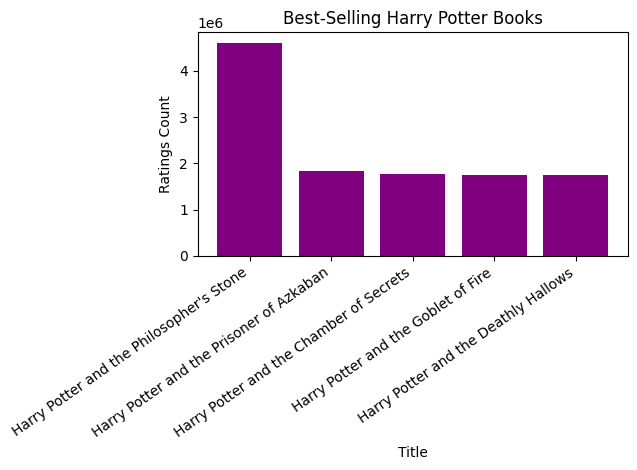

In [7]:
plt.bar(
    best_selling_harry_potter_books["original_title"],
    best_selling_harry_potter_books["ratings_count"],
    color="purple",
)  
plt.xlabel("Title")
plt.ylabel("Ratings Count")
plt.title("Best-Selling Harry Potter Books")
plt.xticks(rotation=35, ha="right")  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust spacing
plt.show()

## Calculate average rating

In [8]:
average_rating_harry_potter = harry_potter_books["average_rating"].mean()
print("\nAverage rating for Harry Potter books: {:.2f}".format(average_rating_harry_potter))


Average rating for Harry Potter books: 4.49
